In [ ]:
# https://medium.com/@curiousily/credit-card-fraud-detection-using-autoencoders-in-keras-tensorflow-for-hackers-part-vii-20e0c85301bd
# https://towardsdatascience.com/applying-anomaly-detection-with-autoencoders-to-fraud-detection-feaaee6b5b09
# https://towardsdatascience.com/detecting-credit-card-fraud-with-autoencoders-in-python-98391cace8a3
# https://github.com/dpanagop/ML_and_AI_examples/blob/master/Credit_Fraud_detection_with_autoencoders.ipynb

In [ ]:
import tensorflow as tf

tf.test.gpu_device_name()

''

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [ ]:
#changing the working directory

%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
% pwd

#Check the present working directory using pwd command

'/content/gdrive/My Drive/Kaggle'

In [ ]:
!ls

Apple-Twitter-Sentiment-DFE.csv    sampleSubmission.csv
apple-twitter-sentiment-texts.csv  sampleSubmission.csv.zip
BitCoinPrice.csv		   sampleSubmission_v2.csv.zip
Bitcoin_tweet_sentiment.csv	   saved_models
BTCUSD_1hr.csv			   submission.csv
BTCUSD_1min.csv			   test.csv
BTCUSD_day.csv			   test_embed_df.csv
Credit_Card_Autoencoder_Model.h5   test.tsv
creditcard.csv			   train.csv
decoder_layer.png		   train_embed_df.csv
decoder.png			   train-sample.csv.zip
encoder_layer.png		   train.tsv
encoder.png			   train_v2.csv
kaggle.json			   transformer.png
Movie_Conversation.csv		   tweetsfinal1.csv
movie_conversations.txt		   tweetsfinal2.csv
movie_lines.txt			   tweetsfinal3.csv
product_descriptions.csv	   tweets_labelled.csv
product_descriptions.csv.zip


In [ ]:
import pandas as pd
# Credit card transations of 2 days

df = pd.read_csv('creditcard.csv')   # Data is transformed using PCA transformation for privacy reasons
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df.isnull().values.any()

False

In [ ]:
df_fraud = df[df['Class'] == 1]  # Highly Imbalanced dataset just like real world scenario
df_fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [ ]:
df_normal = df[df['Class'] == 0]
df_normal

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df_fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
df_normal['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

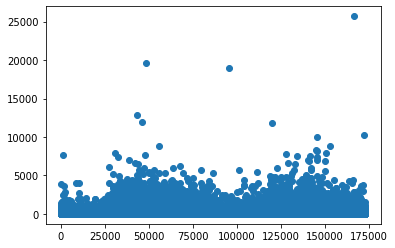

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_normal['Time'], df_normal['Amount'])
plt.show()

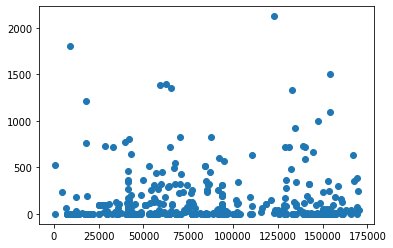

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_fraud['Time'], df_fraud['Amount'])   # Time of the trasaction doesnt really matter as it is distributed throughout
plt.show()

In [ ]:
df1 = df.drop(['Time'], axis = 1)

In [ ]:
# df1['Amount'].describe()

In [ ]:
# 4 Methods - normal with PCA-3, only normal transaction, encoder + knn, compare with svm

x = df1[df1.columns[0:29]]
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [ ]:
y = df1[df1.columns[29]]
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [ ]:
# MinMaxScaler(feature_range = (0, 1)) will transform each value in the column proportionally within the range [0,1]. Use this as the first scaler choice to transform a feature, as it will preserve the shape of the dataset (no distortion).

# StandardScaler() will transform each value in the column to range about the mean 0 and standard deviation 1, ie, each value will be normalised by subtracting the mean and dividing by standard deviation. Use StandardScaler if you know the data distribution is normal.

# If there are outliers, use RobustScaler(). Alternatively you could remove the outliers and use either of the above 2 scalers (choice depends on whether data is normally distributed)

In [ ]:
columns_list = list(x.columns)
columns_list

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

scaled_result = MinMaxScaler().fit_transform(x)
print(scaled_result)

[[9.35192337e-01 7.66490419e-01 8.81364903e-01 ... 4.18976135e-01
  3.12696634e-01 5.82379309e-03]
 [9.78541955e-01 7.70066651e-01 8.40298490e-01 ... 4.16345145e-01
  3.13422663e-01 1.04705276e-04]
 [9.35217023e-01 7.53117667e-01 8.68140819e-01 ... 4.15489266e-01
  3.11911316e-01 1.47389219e-02]
 ...
 [9.90904812e-01 7.64079694e-01 7.81101998e-01 ... 4.16593177e-01
  3.12584864e-01 2.64215395e-03]
 [9.54208999e-01 7.72855742e-01 8.49587129e-01 ... 4.18519535e-01
  3.15245157e-01 3.89238944e-04]
 [9.49231759e-01 7.65256401e-01 8.49601462e-01 ... 4.16466371e-01
  3.13400843e-01 8.44648509e-03]]


In [ ]:
# pca_result = PCA(n_components = 3).fit_transform(scaled_result)
# print(pca_result)

In [ ]:
scaled_df = pd.DataFrame(data = scaled_result, columns = columns_list)
scaled_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,0.252484,0.680908,0.371591,0.635591,0.446084,0.434392,0.737173,0.655066,0.594863,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,0.381188,0.744342,0.486190,0.641219,0.383840,0.464105,0.727794,0.640681,0.551930,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,0.322422,0.706683,0.503854,0.640473,0.511697,0.357443,0.763381,0.644945,0.386683,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,0.271817,0.710910,0.487635,0.636372,0.289124,0.415653,0.711253,0.788492,0.467058,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,0.236355,0.724477,0.552509,0.608406,0.349419,0.434995,0.724243,0.650665,0.626060,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,0.598850,0.190550,0.806406,0.394978,0.801627,0.267218,0.484577,0.789000,0.688412,0.509985,0.595979,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030
284803,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,0.488530,0.276355,0.738709,0.542361,0.623352,0.423414,0.426717,0.730383,0.569303,0.442620,0.580900,0.564933,0.553153,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965
284804,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,0.498692,0.309763,0.706572,0.434111,0.628885,0.435700,0.453827,0.740239,0.680504,0.518236,0.580280,0.565220,0.537005,0.664877,0.468492,0.592824,0.411177,0.416593,0.312585,0.002642
284805,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,0.500464,0.170288,0.667901,0.367667,0.661171,0.483042,0.429998,0.745946,0.729908,0.789612,0.581622,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389


In [ ]:
scaled_df_class = pd.concat([scaled_df, y], axis = 1)
scaled_df_class

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,0.252484,0.680908,0.371591,0.635591,0.446084,0.434392,0.737173,0.655066,0.594863,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,0.381188,0.744342,0.486190,0.641219,0.383840,0.464105,0.727794,0.640681,0.551930,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,0.322422,0.706683,0.503854,0.640473,0.511697,0.357443,0.763381,0.644945,0.386683,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,0.271817,0.710910,0.487635,0.636372,0.289124,0.415653,0.711253,0.788492,0.467058,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,0.236355,0.724477,0.552509,0.608406,0.349419,0.434995,0.724243,0.650665,0.626060,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,0.598850,0.190550,0.806406,0.394978,0.801627,0.267218,0.484577,0.789000,0.688412,0.509985,0.595979,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030,0
284803,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,0.488530,0.276355,0.738709,0.542361,0.623352,0.423414,0.426717,0.730383,0.569303,0.442620,0.580900,0.564933,0.553153,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965,0
284804,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,0.498692,0.309763,0.706572,0.434111,0.628885,0.435700,0.453827,0.740239,0.680504,0.518236,0.580280,0.565220,0.537005,0.664877,0.468492,0.592824,0.411177,0.416593,0.312585,0.002642,0
284805,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,0.500464,0.170288,0.667901,0.367667,0.661171,0.483042,0.429998,0.745946,0.729908,0.789612,0.581622,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389,0


In [ ]:
df_normal = scaled_df_class[scaled_df_class['Class'] == 0]
df_normal

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,0.252484,0.680908,0.371591,0.635591,0.446084,0.434392,0.737173,0.655066,0.594863,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,0.381188,0.744342,0.486190,0.641219,0.383840,0.464105,0.727794,0.640681,0.551930,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,0.322422,0.706683,0.503854,0.640473,0.511697,0.357443,0.763381,0.644945,0.386683,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,0.271817,0.710910,0.487635,0.636372,0.289124,0.415653,0.711253,0.788492,0.467058,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,0.236355,0.724477,0.552509,0.608406,0.349419,0.434995,0.724243,0.650665,0.626060,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,0.598850,0.190550,0.806406,0.394978,0.801627,0.267218,0.484577,0.789000,0.688412,0.509985,0.595979,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030,0
284803,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,0.488530,0.276355,0.738709,0.542361,0.623352,0.423414,0.426717,0.730383,0.569303,0.442620,0.580900,0.564933,0.553153,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965,0
284804,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,0.498692,0.309763,0.706572,0.434111,0.628885,0.435700,0.453827,0.740239,0.680504,0.518236,0.580280,0.565220,0.537005,0.664877,0.468492,0.592824,0.411177,0.416593,0.312585,0.002642,0
284805,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,0.500464,0.170288,0.667901,0.367667,0.661171,0.483042,0.429998,0.745946,0.729908,0.789612,0.581622,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389,0


In [ ]:
df_fraud = scaled_df_class[scaled_df_class['Class'] == 1]
df_fraud 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,0.919012,0.787855,0.809517,0.429154,0.762201,0.248677,0.249897,0.800314,0.367355,0.451365,0.475697,0.594895,0.402257,0.501833,0.365462,0.413074,0.648900,0.652135,0.595876,0.581617,0.569817,0.508396,0.658525,0.425381,0.580406,0.454498,0.421331,0.310216,0.000000,1
623,0.906588,0.733944,0.856275,0.353384,0.774870,0.252314,0.267339,0.784658,0.453446,0.491372,0.260633,0.685229,0.500697,0.589161,0.485889,0.470557,0.748555,0.771954,0.585442,0.602650,0.572146,0.530346,0.685868,0.342644,0.593612,0.401704,0.411845,0.313850,0.020591,1
4920,0.919163,0.785821,0.831180,0.355228,0.760185,0.262258,0.268781,0.781104,0.454573,0.477162,0.406174,0.456940,0.450106,0.596623,0.284085,0.376774,0.592189,0.473395,0.459106,0.575687,0.556737,0.466535,0.667999,0.370467,0.569143,0.336811,0.417241,0.310018,0.009339,1
6108,0.883578,0.781591,0.792483,0.370723,0.758122,0.245862,0.244056,0.782717,0.454245,0.409378,0.576421,0.292886,0.462603,0.418385,0.335780,0.215353,0.365070,0.300361,0.587393,0.578438,0.570726,0.518287,0.658956,0.375025,0.592075,0.318049,0.401244,0.330364,0.002297,1
6329,0.979262,0.799121,0.762821,0.461731,0.790114,0.249369,0.275794,0.780061,0.418588,0.458085,0.410244,0.530455,0.561684,0.441644,0.310967,0.531459,0.926949,0.862545,0.350761,0.580362,0.555369,0.477181,0.655679,0.162235,0.661482,0.518034,0.416326,0.316103,0.000039,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,0.925541,0.779136,0.759117,0.329475,0.755171,0.242806,0.259977,0.792864,0.391646,0.393113,0.411103,0.500009,0.352724,0.421946,0.366357,0.357196,0.598329,0.562841,0.593862,0.593606,0.574031,0.495141,0.674930,0.342499,0.608078,0.554231,0.421913,0.316127,0.015180,1
280143,0.981714,0.780863,0.750697,0.314516,0.768696,0.249683,0.256746,0.788051,0.423943,0.441850,0.455267,0.587469,0.386984,0.470870,0.290441,0.380810,0.636201,0.605939,0.620920,0.582673,0.567454,0.511348,0.663271,0.371313,0.607201,0.546239,0.423694,0.316911,0.000030,1
280149,0.946807,0.779143,0.799053,0.272690,0.758173,0.262986,0.251741,0.798367,0.440311,0.437055,0.392025,0.599602,0.415901,0.509637,0.283054,0.398373,0.584823,0.618422,0.584108,0.582906,0.573599,0.548942,0.668269,0.386556,0.536386,0.502403,0.423619,0.317068,0.003032,1
281144,0.905394,0.773440,0.743844,0.332480,0.760057,0.233425,0.251904,0.796742,0.406549,0.400185,0.400264,0.514594,0.361058,0.430304,0.346886,0.368274,0.597045,0.551631,0.560544,0.583526,0.570882,0.497472,0.658660,0.357486,0.559486,0.524456,0.432844,0.307976,0.009536,1


In [ ]:
df_normal1 = df_normal.drop(['Class'], axis = 1)
df_normal1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,0.252484,0.680908,0.371591,0.635591,0.446084,0.434392,0.737173,0.655066,0.594863,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,0.381188,0.744342,0.486190,0.641219,0.383840,0.464105,0.727794,0.640681,0.551930,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,0.322422,0.706683,0.503854,0.640473,0.511697,0.357443,0.763381,0.644945,0.386683,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,0.271817,0.710910,0.487635,0.636372,0.289124,0.415653,0.711253,0.788492,0.467058,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,0.236355,0.724477,0.552509,0.608406,0.349419,0.434995,0.724243,0.650665,0.626060,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,0.598850,0.190550,0.806406,0.394978,0.801627,0.267218,0.484577,0.789000,0.688412,0.509985,0.595979,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030
284803,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,0.488530,0.276355,0.738709,0.542361,0.623352,0.423414,0.426717,0.730383,0.569303,0.442620,0.580900,0.564933,0.553153,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965
284804,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,0.498692,0.309763,0.706572,0.434111,0.628885,0.435700,0.453827,0.740239,0.680504,0.518236,0.580280,0.565220,0.537005,0.664877,0.468492,0.592824,0.411177,0.416593,0.312585,0.002642
284805,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,0.500464,0.170288,0.667901,0.367667,0.661171,0.483042,0.429998,0.745946,0.729908,0.789612,0.581622,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389


In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error

x_train, x_test = train_test_split(scaled_df_class,  stratify = scaled_df_class['Class'],  test_size = 0.3, random_state = 100)
x_train = x_train.drop(['Class'], axis = 1)

x_test_y = x_test['Class']
x_test = x_test.drop(['Class'], axis = 1)

n_features = df_normal1.shape[1]

encoder = Sequential(name = 'encoder')
encoder.add(Dense(units = 20, activation = 'relu', input_shape = [n_features]))
encoder.add(Dropout(0.1))
encoder.add(Dense(units = 10, activation = 'relu'))
encoder.add(Dense(units = 5, activation = 'relu'))

decoder = Sequential(name = 'decoder')
decoder.add(Dense(units = 10, activation = 'relu', input_shape = [5]))
decoder.add(Dense(units = 20, activation = 'relu'))
decoder.add(Dropout(0.1))
decoder.add(Dense(units = n_features, activation = 'sigmoid'))

autoencoder = Sequential([encoder, decoder])

autoencoder.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])

encoder.summary()
decoder.summary()
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                600       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________
Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)     

## METHOD 1: USING RECONTRUCTION ERROR AND AUTOENCODERS

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor = 'val_loss', min_delta = 0.00001, patience = 20, restore_best_weights = True)
checkpointer = ModelCheckpoint(filepath="/content/gdrive/My Drive/Kaggle/Credit_Card_Autoencoder_Model.h5", verbose=1, save_best_only=True)

history = autoencoder.fit(x_train, x_train, epochs = 50, verbose = 1, validation_data = [x_test, x_test], callbacks = [es, checkpointer])

# history = autoencoder.fit(x_train, x_train, epochs = 50, verbose = 1, validation_data = [x_test, x_test], callbacks = [es])

Epoch 1/50
6228/6231 [============================>.] - ETA: 0s - loss: 0.0022 - accuracy: 0.9749
Epoch 00001: val_loss improved from inf to 0.00136, saving model to /content/gdrive/My Drive/Kaggle/Credit_Card_Autoencoder_Model.h5
6231/6231 [==============================] - 17s 3ms/step - loss: 0.0022 - accuracy: 0.9749 - val_loss: 0.0014 - val_accuracy: 0.9915
Epoch 2/50
6219/6231 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9919
Epoch 00002: val_loss improved from 0.00136 to 0.00111, saving model to /content/gdrive/My Drive/Kaggle/Credit_Card_Autoencoder_Model.h5
6231/6231 [==============================] - 15s 2ms/step - loss: 0.0012 - accuracy: 0.9919 - val_loss: 0.0011 - val_accuracy: 0.9915
Epoch 3/50
6227/6231 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9919
Epoch 00003: val_loss improved from 0.00111 to 0.00106, saving model to /content/gdrive/My Drive/Kaggle/Credit_Card_Autoencoder_Model.h5
6231/6231 [====================

In [ ]:
from tensorflow.keras import losses 
import numpy as np

train_predicted = autoencoder.predict(x_train)
train_mse = losses.mean_squared_error(x_train, train_predicted)
print(train_mse)
cutoff = np.percentile(train_mse, 95)
print(cutoff)

tf.Tensor([0.0026192  0.00067182 0.00030517 ... 0.00234472 0.00100143 0.00104624], shape=(199364,), dtype=float32)
0.0019473633728921413


In [ ]:
from tensorflow.keras import losses 
import numpy as np

test_predicted = autoencoder.predict(x_test)
test_mse = losses.mean_squared_error(x_test, test_predicted)
print(test_mse)

tf.Tensor([0.00072872 0.00061533 0.0012774  ... 0.000468   0.00035019 0.00131882], shape=(85443,), dtype=float32)


In [ ]:
c=np.array(test_mse)
c.shape

(85443,)

In [ ]:
test_labels = []

for error in test_mse:
  if error >= 0.0019:
    test_labels.append([1])
  else:
    test_labels.append([0])

print(test_labels)

[[0], [0], [0], [0], [1], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [1], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [1], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0],

In [ ]:
# df_fraud1 = df_fraud.drop(['Class'], axis = 1)
# df_fraud1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [ ]:
# test_predicted = autoencoder.predict(x_test)
# test_mse = losses.mean_squared_error(x_test, test_predicted)
# print(test_mse)

tf.Tensor(
[9.7098187e+02 1.2394336e+02 3.1647849e+00 ... 2.8216839e-01 1.0344898e+02
 2.5823500e+01], shape=(56863,), dtype=float32)


In [ ]:
# We gave up on classifiying 5% of normal transactions as fraudulant, this can be improved by better feature extraction - analyze data to understand features
# Some valuable features for credit card fraud are the number of transactions in the previous hour/day/week, if the transaction initiated in a different country than the issued country.
# Improve model by doing Hyperparameter optimization

In [ ]:
x_test_y = (x_test_y).tolist()

In [ ]:
temp = []

for i in x_test_y:
  temp.append([i])



AttributeError: ignored

In [ ]:
x_test_y = temp

In [ ]:
type(x_test_y)

list

In [ ]:
type(test_labels)

list

In [ ]:
a = np.array(x_test_y)

In [ ]:
a.shape

(85443, 1)

In [ ]:
b = np.array(test_labels)

In [ ]:
b.shape

(85443, 1)

0.9422108168312519
[0.00000000e+00 1.17240166e-05 4.68960666e-05 ... 9.97115892e-01
 9.97139340e-01 1.00000000e+00]
[0. 0. 0. ... 1. 1. 1.]
[1.0780842e+00 7.8084171e-02 4.9130052e-02 ... 1.7551657e-04 1.7547605e-04
 9.5919080e-05]


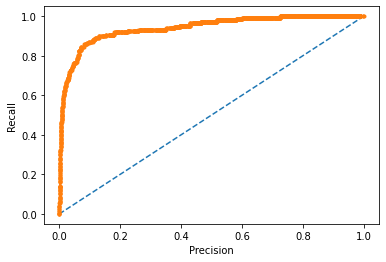

In [ ]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


precision, recall, thresholds = precision_recall_curve(x_test_y, test_labels)
# lr_f1 = f1_score(precision, recall)
# print(lr_f1)

lr_auc = roc_auc_score(a, c)
# lr_auc = auc(recall, precision)
print(lr_auc)

fpr, tpr, thresholds = roc_curve(y_true = a, y_score = c)
print(fpr)
print(tpr)
print(thresholds)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(a, b)

In [ ]:
conf_matrix

array([[80757,  4538],
       [   35,   113]])

In [ ]:
tp_and_fn = conf_matrix.sum(1)
tp_and_fp = conf_matrix.sum(0)
tp = conf_matrix.diagonal()

precision = tp / tp_and_fp
recall = tp / tp_and_fn

print(precision)
print(recall)

[0.99956679 0.02429585]
[0.94679641 0.76351351]


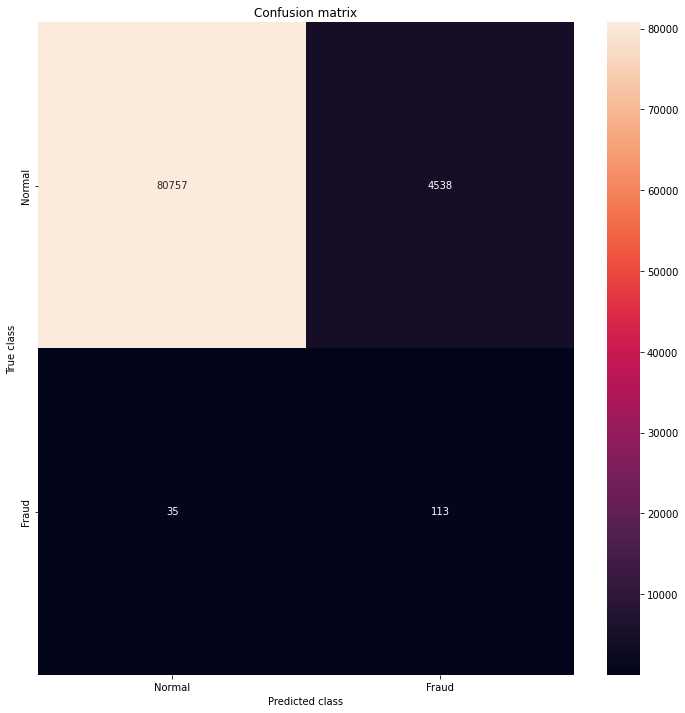

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'], annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
# We can vary the error threshold to change this
# We can see that for fraud class precision is 0.024 - alg classified a lot of normal preds as fraud
# but recall is good 0.76 - that is alg could detect 76% of fraud transactions successfully
# Adding more layer in the autoencoder
# changing number of neuron in the final layer of nn

## METHOD 1: USING ENCODER PART OF AUTO ENCODER AND K NEAREST NEIGHBOUR

In [ ]:
# import tensorflow as tf
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import Dropout
# from sklearn.metrics import mean_squared_error

# x_train1, x_test1 = train_test_split(scaled_df_class,  stratify = scaled_df_class['Class'],  test_size = 0.3, random_state = 200)
# y_train1 = x_train1['Class']
# x_train1 = x_train1.drop(['Class'], axis = 1)

# n_featuresk = df_normal1.shape[1]

# # encoder = Sequential(name = 'encoder')
# # encoder1 = encoder.add(Dense(units = 12, activation = 'tanh', input_shape = [n_featuresk]))

# # decoder = Sequential(name = 'decoder')
# # decoder1 = decoder.add(Dense(units = 29, activation = 'sigmoid'))

# # autoencoder1 = Sequential([encoder, decoder1])
# # ...
# # autoencoder = Sequential(name = 'encoder')
# # autoencoder.add(Dense(units = 12, activation = 'tanh', input_shape = [n_featuresk]))
# # autoencoder.add(Dense(units = 29, activation = 'sigmoid'))
# #....
# autoencoder.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])

# # encoder1.summary()
# # decoder1.summary()
# autoencoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 12)                360       
                                                                 
 dense_21 (Dense)            (None, 29)                377       
                                                                 
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
scaled_df_class

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,0.252484,0.680908,0.371591,0.635591,0.446084,0.434392,0.737173,0.655066,0.594863,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,0.381188,0.744342,0.486190,0.641219,0.383840,0.464105,0.727794,0.640681,0.551930,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,0.322422,0.706683,0.503854,0.640473,0.511697,0.357443,0.763381,0.644945,0.386683,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,0.271817,0.710910,0.487635,0.636372,0.289124,0.415653,0.711253,0.788492,0.467058,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,0.236355,0.724477,0.552509,0.608406,0.349419,0.434995,0.724243,0.650665,0.626060,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,0.598850,0.190550,0.806406,0.394978,0.801627,0.267218,0.484577,0.789000,0.688412,0.509985,0.595979,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030,0
284803,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,0.488530,0.276355,0.738709,0.542361,0.623352,0.423414,0.426717,0.730383,0.569303,0.442620,0.580900,0.564933,0.553153,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965,0
284804,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,0.498692,0.309763,0.706572,0.434111,0.628885,0.435700,0.453827,0.740239,0.680504,0.518236,0.580280,0.565220,0.537005,0.664877,0.468492,0.592824,0.411177,0.416593,0.312585,0.002642,0
284805,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,0.500464,0.170288,0.667901,0.367667,0.661171,0.483042,0.429998,0.745946,0.729908,0.789612,0.581622,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389,0


In [ ]:
x_train1, x_test1 = train_test_split(scaled_df_class, stratify = scaled_df_class['Class'],  test_size = 0.3, random_state = 200)

In [ ]:
x_train1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
99622,0.925156,0.784039,0.844470,0.303091,0.766837,0.278585,0.263332,0.798187,0.450529,0.505589,0.281623,0.741673,0.477802,0.661538,0.409854,0.385332,0.784065,0.502225,0.528388,0.576659,0.564632,0.541446,0.667508,0.256561,0.560931,0.396020,0.408573,0.315257,0.000661,0
217644,0.953077,0.779433,0.836384,0.227766,0.766646,0.251390,0.269797,0.787250,0.451360,0.495011,0.229640,0.730838,0.513181,0.655367,0.296956,0.449083,0.722960,0.597967,0.555587,0.579379,0.558184,0.485839,0.667425,0.390131,0.553360,0.447891,0.418806,0.313869,0.000428,0
146275,0.957804,0.778204,0.824860,0.207200,0.772306,0.244922,0.275656,0.780373,0.453169,0.499295,0.223384,0.683225,0.362169,0.675972,0.329623,0.429302,0.721002,0.633766,0.552810,0.578966,0.565353,0.550169,0.662053,0.392672,0.559019,0.439852,0.423681,0.318554,0.000295,0
101471,0.953473,0.757094,0.869142,0.174492,0.754644,0.261902,0.266595,0.783697,0.390523,0.531406,0.336965,0.677341,0.401006,0.625746,0.233461,0.423420,0.750675,0.673444,0.604589,0.580997,0.557056,0.488827,0.670126,0.443952,0.567881,0.354731,0.414155,0.309888,0.006422,0
219879,0.994011,0.774434,0.791447,0.277956,0.772655,0.249486,0.268181,0.780556,0.474099,0.483006,0.272468,0.716725,0.575021,0.549114,0.407931,0.478575,0.772074,0.744659,0.530104,0.579928,0.562536,0.532032,0.663075,0.262515,0.600921,0.415466,0.417048,0.313195,0.000039,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21487,0.948758,0.772254,0.869591,0.271226,0.763685,0.265864,0.268747,0.785309,0.401973,0.513282,0.245041,0.716712,0.534703,0.634904,0.327229,0.365252,0.753348,0.689633,0.543396,0.577792,0.555610,0.490661,0.663336,0.392710,0.602342,0.395616,0.418577,0.314758,0.002390,0
116464,0.977561,0.761689,0.843448,0.286319,0.760865,0.261936,0.263796,0.784922,0.436832,0.522239,0.238679,0.710845,0.453146,0.644425,0.319525,0.378978,0.746481,0.680401,0.473388,0.575431,0.554697,0.478398,0.664793,0.389254,0.607213,0.373406,0.417458,0.313800,0.003192,0
199613,0.866618,0.821470,0.784925,0.122161,0.772231,0.253330,0.278492,0.776869,0.635449,0.685365,0.360051,0.693496,0.349953,0.587063,0.326750,0.407666,0.688431,0.638091,0.529191,0.616951,0.548199,0.535790,0.662767,0.401840,0.619525,0.409280,0.432555,0.299107,0.000036,0
173623,0.958465,0.778633,0.792081,0.198885,0.782341,0.305511,0.251017,0.738625,0.443776,0.469888,0.290193,0.724031,0.382481,0.653410,0.346257,0.470799,0.748366,0.622663,0.490204,0.592705,0.514819,0.492178,0.672095,0.458675,0.601004,0.462339,0.415021,0.316173,0.000077,0


In [ ]:
x_test1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
30451,0.946095,0.774169,0.877731,0.364309,0.767223,0.273689,0.264069,0.789484,0.446289,0.517037,0.207491,0.693639,0.460402,0.629905,0.359844,0.449138,0.731658,0.641672,0.575275,0.580027,0.561924,0.523052,0.666893,0.318920,0.550858,0.439520,0.418157,0.316187,0.000118,0
203653,0.958477,0.774603,0.831614,0.303235,0.774347,0.254706,0.268378,0.782462,0.442503,0.500486,0.237606,0.695418,0.528451,0.619532,0.490631,0.425041,0.762252,0.732877,0.761292,0.584904,0.566835,0.561133,0.661594,0.292869,0.555502,0.472679,0.421212,0.318038,0.000398,0
38413,0.944749,0.769431,0.856165,0.236028,0.759409,0.264315,0.266175,0.791920,0.463832,0.490844,0.304597,0.739913,0.472843,0.647170,0.267241,0.478969,0.705292,0.707146,0.522502,0.580995,0.568636,0.556483,0.671101,0.386781,0.518123,0.460668,0.417348,0.316431,0.005839,0
91080,0.941980,0.769043,0.861054,0.234390,0.771872,0.254826,0.266684,0.784158,0.461037,0.514198,0.392565,0.742694,0.459737,0.644818,0.333789,0.458633,0.709152,0.611867,0.488826,0.577648,0.557787,0.493611,0.663829,0.412968,0.550294,0.402320,0.415022,0.308321,0.000201,0
273549,0.903620,0.803631,0.799537,0.220566,0.760870,0.247307,0.265242,0.800254,0.472246,0.528115,0.198051,0.740176,0.488210,0.678022,0.261149,0.438294,0.742840,0.606964,0.547837,0.585089,0.561885,0.520257,0.666192,0.392701,0.595489,0.480385,0.424733,0.321305,0.000117,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99739,0.926744,0.788237,0.834337,0.248002,0.759148,0.255836,0.261577,0.801570,0.447329,0.501706,0.312263,0.701565,0.313798,0.678232,0.362862,0.484263,0.738130,0.707785,0.583646,0.579515,0.558379,0.468797,0.667269,0.367220,0.575412,0.441372,0.417858,0.313135,0.000382,0
120397,0.979638,0.771506,0.842957,0.282391,0.763616,0.252389,0.266164,0.782788,0.460391,0.502463,0.288183,0.726530,0.517867,0.631889,0.412593,0.463566,0.729862,0.627039,0.547456,0.579868,0.556970,0.473881,0.667233,0.431255,0.591308,0.440497,0.416166,0.313779,0.000077,0
267602,0.995116,0.750396,0.821123,0.174373,0.758804,0.265086,0.257387,0.785634,0.415044,0.543146,0.310192,0.708835,0.538976,0.628881,0.282675,0.443949,0.731743,0.689336,0.575793,0.577739,0.560153,0.516872,0.668096,0.412031,0.564163,0.392073,0.416790,0.312270,0.002647,0
55890,0.979170,0.769075,0.833887,0.272000,0.765691,0.253333,0.268201,0.782183,0.457894,0.507216,0.245396,0.706543,0.449410,0.662334,0.397217,0.455171,0.718850,0.605398,0.585350,0.580264,0.555196,0.450974,0.666112,0.365002,0.596514,0.452392,0.415145,0.313372,0.002059,0


In [ ]:
y_train1 = x_train1['Class']
x_train1 = x_train1.drop(['Class'], axis = 1)

In [ ]:
x_train1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
99622,0.925156,0.784039,0.844470,0.303091,0.766837,0.278585,0.263332,0.798187,0.450529,0.505589,0.281623,0.741673,0.477802,0.661538,0.409854,0.385332,0.784065,0.502225,0.528388,0.576659,0.564632,0.541446,0.667508,0.256561,0.560931,0.396020,0.408573,0.315257,0.000661
217644,0.953077,0.779433,0.836384,0.227766,0.766646,0.251390,0.269797,0.787250,0.451360,0.495011,0.229640,0.730838,0.513181,0.655367,0.296956,0.449083,0.722960,0.597967,0.555587,0.579379,0.558184,0.485839,0.667425,0.390131,0.553360,0.447891,0.418806,0.313869,0.000428
146275,0.957804,0.778204,0.824860,0.207200,0.772306,0.244922,0.275656,0.780373,0.453169,0.499295,0.223384,0.683225,0.362169,0.675972,0.329623,0.429302,0.721002,0.633766,0.552810,0.578966,0.565353,0.550169,0.662053,0.392672,0.559019,0.439852,0.423681,0.318554,0.000295
101471,0.953473,0.757094,0.869142,0.174492,0.754644,0.261902,0.266595,0.783697,0.390523,0.531406,0.336965,0.677341,0.401006,0.625746,0.233461,0.423420,0.750675,0.673444,0.604589,0.580997,0.557056,0.488827,0.670126,0.443952,0.567881,0.354731,0.414155,0.309888,0.006422
219879,0.994011,0.774434,0.791447,0.277956,0.772655,0.249486,0.268181,0.780556,0.474099,0.483006,0.272468,0.716725,0.575021,0.549114,0.407931,0.478575,0.772074,0.744659,0.530104,0.579928,0.562536,0.532032,0.663075,0.262515,0.600921,0.415466,0.417048,0.313195,0.000039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21487,0.948758,0.772254,0.869591,0.271226,0.763685,0.265864,0.268747,0.785309,0.401973,0.513282,0.245041,0.716712,0.534703,0.634904,0.327229,0.365252,0.753348,0.689633,0.543396,0.577792,0.555610,0.490661,0.663336,0.392710,0.602342,0.395616,0.418577,0.314758,0.002390
116464,0.977561,0.761689,0.843448,0.286319,0.760865,0.261936,0.263796,0.784922,0.436832,0.522239,0.238679,0.710845,0.453146,0.644425,0.319525,0.378978,0.746481,0.680401,0.473388,0.575431,0.554697,0.478398,0.664793,0.389254,0.607213,0.373406,0.417458,0.313800,0.003192
199613,0.866618,0.821470,0.784925,0.122161,0.772231,0.253330,0.278492,0.776869,0.635449,0.685365,0.360051,0.693496,0.349953,0.587063,0.326750,0.407666,0.688431,0.638091,0.529191,0.616951,0.548199,0.535790,0.662767,0.401840,0.619525,0.409280,0.432555,0.299107,0.000036
173623,0.958465,0.778633,0.792081,0.198885,0.782341,0.305511,0.251017,0.738625,0.443776,0.469888,0.290193,0.724031,0.382481,0.653410,0.346257,0.470799,0.748366,0.622663,0.490204,0.592705,0.514819,0.492178,0.672095,0.458675,0.601004,0.462339,0.415021,0.316173,0.000077


In [ ]:
y_train1

99622     0
217644    0
146275    0
101471    0
219879    0
         ..
21487     0
116464    0
199613    0
173623    0
277841    0
Name: Class, Length: 199364, dtype: int64

In [ ]:
y_test1 = x_test1['Class']
x_test1 = x_test1.drop(['Class'], axis = 1)

In [ ]:
x_test1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
30451,0.946095,0.774169,0.877731,0.364309,0.767223,0.273689,0.264069,0.789484,0.446289,0.517037,0.207491,0.693639,0.460402,0.629905,0.359844,0.449138,0.731658,0.641672,0.575275,0.580027,0.561924,0.523052,0.666893,0.318920,0.550858,0.439520,0.418157,0.316187,0.000118
203653,0.958477,0.774603,0.831614,0.303235,0.774347,0.254706,0.268378,0.782462,0.442503,0.500486,0.237606,0.695418,0.528451,0.619532,0.490631,0.425041,0.762252,0.732877,0.761292,0.584904,0.566835,0.561133,0.661594,0.292869,0.555502,0.472679,0.421212,0.318038,0.000398
38413,0.944749,0.769431,0.856165,0.236028,0.759409,0.264315,0.266175,0.791920,0.463832,0.490844,0.304597,0.739913,0.472843,0.647170,0.267241,0.478969,0.705292,0.707146,0.522502,0.580995,0.568636,0.556483,0.671101,0.386781,0.518123,0.460668,0.417348,0.316431,0.005839
91080,0.941980,0.769043,0.861054,0.234390,0.771872,0.254826,0.266684,0.784158,0.461037,0.514198,0.392565,0.742694,0.459737,0.644818,0.333789,0.458633,0.709152,0.611867,0.488826,0.577648,0.557787,0.493611,0.663829,0.412968,0.550294,0.402320,0.415022,0.308321,0.000201
273549,0.903620,0.803631,0.799537,0.220566,0.760870,0.247307,0.265242,0.800254,0.472246,0.528115,0.198051,0.740176,0.488210,0.678022,0.261149,0.438294,0.742840,0.606964,0.547837,0.585089,0.561885,0.520257,0.666192,0.392701,0.595489,0.480385,0.424733,0.321305,0.000117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99739,0.926744,0.788237,0.834337,0.248002,0.759148,0.255836,0.261577,0.801570,0.447329,0.501706,0.312263,0.701565,0.313798,0.678232,0.362862,0.484263,0.738130,0.707785,0.583646,0.579515,0.558379,0.468797,0.667269,0.367220,0.575412,0.441372,0.417858,0.313135,0.000382
120397,0.979638,0.771506,0.842957,0.282391,0.763616,0.252389,0.266164,0.782788,0.460391,0.502463,0.288183,0.726530,0.517867,0.631889,0.412593,0.463566,0.729862,0.627039,0.547456,0.579868,0.556970,0.473881,0.667233,0.431255,0.591308,0.440497,0.416166,0.313779,0.000077
267602,0.995116,0.750396,0.821123,0.174373,0.758804,0.265086,0.257387,0.785634,0.415044,0.543146,0.310192,0.708835,0.538976,0.628881,0.282675,0.443949,0.731743,0.689336,0.575793,0.577739,0.560153,0.516872,0.668096,0.412031,0.564163,0.392073,0.416790,0.312270,0.002647
55890,0.979170,0.769075,0.833887,0.272000,0.765691,0.253333,0.268201,0.782183,0.457894,0.507216,0.245396,0.706543,0.449410,0.662334,0.397217,0.455171,0.718850,0.605398,0.585350,0.580264,0.555196,0.450974,0.666112,0.365002,0.596514,0.452392,0.415145,0.313372,0.002059


In [ ]:
y_test1

30451     0
203653    0
38413     0
91080     0
273549    0
         ..
99739     0
120397    0
267602    0
55890     0
94926     0
Name: Class, Length: 85443, dtype: int64

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from keras.models import Model
from sklearn.metrics import mean_squared_error

# x_train1, x_test1 = train_test_split(scaled_df_class,  stratify = scaled_df_class['Class'],  test_size = 0.3, random_state = 200)
# y_train1 = x_train1['Class']
# x_train1 = x_train1.drop(['Class'], axis = 1)

n_featuresk = x_train1.shape[1]

input_layer_all = Input(shape=(n_featuresk , ))
encoded_all = Dense(12,activation='tanh')(input_layer_all)
decoded_all = Dense(n_featuresk ,activation='sigmoid')(encoded_all)
autoencoder_all = Model(input_layer_all,decoded_all)

autoencoder_all.compile(optimizer='adam',loss='mean_squared_error', metrics = ['accuracy'])

In [ ]:
y_train1.value_counts()

0    199020
1       344
Name: Class, dtype: int64

In [ ]:
y_test1.value_counts()

0    85295
1      148
Name: Class, dtype: int64

In [ ]:
y_test1

30451     0
203653    0
38413     0
91080     0
273549    0
         ..
99739     0
120397    0
267602    0
55890     0
94926     0
Name: Class, Length: 85443, dtype: int64

In [ ]:
autoencoder_all.fit(x_train1, x_train1, epochs = 100, batch_size=128, validation_data=(x_train1, x_train1))

Epoch 1/100
1558/1558 [==============================] - 6s 4ms/step - loss: 0.0030 - accuracy: 0.9773 - val_loss: 0.0016 - val_accuracy: 0.9919
Epoch 2/100
1558/1558 [==============================] - 5s 3ms/step - loss: 0.0014 - accuracy: 0.9919 - val_loss: 0.0012 - val_accuracy: 0.9919
Epoch 3/100
1558/1558 [==============================] - 4s 3ms/step - loss: 9.5532e-04 - accuracy: 0.9919 - val_loss: 7.3128e-04 - val_accuracy: 0.9919
Epoch 4/100
1558/1558 [==============================] - 4s 3ms/step - loss: 5.9178e-04 - accuracy: 0.9919 - val_loss: 4.9116e-04 - val_accuracy: 0.9919
Epoch 5/100
1558/1558 [==============================] - 5s 3ms/step - loss: 4.1770e-04 - accuracy: 0.9920 - val_loss: 3.6411e-04 - val_accuracy: 0.9920
Epoch 6/100
1558/1558 [==============================] - 5s 3ms/step - loss: 3.4003e-04 - accuracy: 0.9919 - val_loss: 3.2092e-04 - val_accuracy: 0.9920
Epoch 7/100
1558/1558 [==============================] - 5s 3ms/step - loss: 3.0737e-04 - accuracy

In [ ]:
from keras.models import Model

encoder_all = Model(input_layer_all,encoded_all)
enc_new = encoder_all.predict(x_train1)

In [ ]:
enc_new

array([[-0.49694115, -0.23764011,  0.22187525, ..., -0.09625787,
         0.13049272, -0.3718673 ],
       [-0.32938886, -0.1139757 ,  0.22165376, ..., -0.10897534,
         0.27426282, -0.309417  ],
       [-0.3906794 , -0.10811011,  0.04153911, ..., -0.07845671,
         0.13960852, -0.37966123],
       ...,
       [-0.34023094, -0.12804872, -0.00380338, ...,  0.00916338,
         0.530477  , -0.5154018 ],
       [-0.42514947, -0.10463197,  0.06975702, ..., -0.11878499,
         0.2528119 , -0.30482918],
       [-0.44833416, -0.1817884 ,  0.07231373, ..., -0.10156057,
         0.09784158, -0.3589651 ]], dtype=float32)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 3)

In [ ]:
# Train the model using the training sets

knn_model.fit(enc_new, y_train1)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_predicted = knn_model.predict(encoder_all.predict(x_test1))

In [ ]:
knn_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test1, knn_predicted)

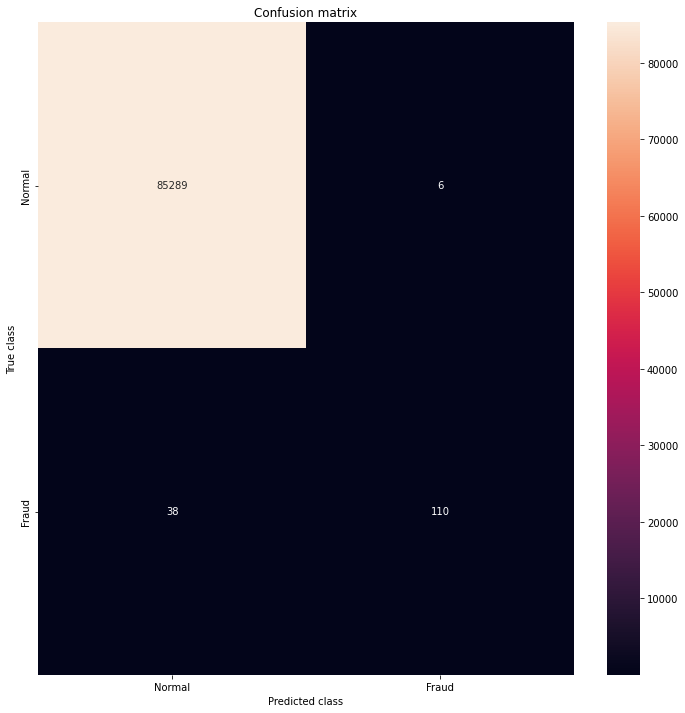

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'], annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
tp_and_fn = conf_matrix.sum(1)
tp_and_fp = conf_matrix.sum(0)
tp = conf_matrix.diagonal()

precision = tp / tp_and_fp
recall = tp / tp_and_fn

print(precision)
print(recall)

[0.99955465 0.94827586]
[0.99992966 0.74324324]


In [ ]:
# Now our precision has become 0.94 and recall is 0.74 which is pretty good
# The model is able to detect 74 % of fraud transactions and mistakes are only 0.06 % which is pretty impressive